In [1]:
from functions_for_all_nutrients import *
from iron_hemoglobin_functions import *

In [93]:
#zinc = pd.read_pickle('results_raw/zinc.pkl')
#zinc['nutrient'] = 'zinc'
#vitamin_a = pd.read_pickle('results_raw/vitamin_a.pkl')
#vitamin_a['nutrient'] = 'vitamin_a'
iron_u5 = pd.read_pickle('results_raw/iron_u5.pkl')
iron_u5['nutrient'] = 'iron'
iron_wra = pd.read_pickle('results_raw/iron_wra.pkl')
iron_wra['nutrient'] = 'iron'
iron = (iron_wra.set_index([c for c in iron_wra.columns if 'draw' not in c]) 
        + iron_u5.set_index([c for c in iron_u5.columns if 'draw' not in c])).reset_index()
iron['vehicle'] = 'wheat flour'

#results = pd.concat([zinc, vitamin_a, iron], ignore_index=True)
results = iron.copy()

results['nutrient_name'] = results.nutrient.str.replace('_',' ').str.capitalize().str.replace('Vitamin a', 'Vitamin A')
l = get_ids('location')
results = results.merge(l, on='location_id')
results

,location_id,coverage_level,year,measure,nutrient,draw_0,draw_1,draw_10,draw_100,draw_101,...,draw_995,draw_996,draw_997,draw_998,draw_999,vehicle,nutrient_name,location_name,location_type,location_description
0,15,0.2,2021,counts_averted,iron,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,wheat flour,Iron,Myanmar,admin0,admin0
1,15,0.2,2021,pif,iron,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,wheat flour,Iron,Myanmar,admin0,admin0
2,15,0.2,2021,rates_averted,iron,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,wheat flour,Iron,Myanmar,admin0,admin0
3,15,0.2,2022,counts_averted,iron,202.748927,114.464523,95.446834,73.114166,176.114651,...,141.858655,166.622894,105.985506,98.229340,102.835492,wheat flour,Iron,Myanmar,admin0,admin0
4,15,0.2,2022,pif,iron,0.127076,0.070379,0.076311,0.042808,0.145841,...,0.091425,0.226512,0.088790,0.080930,0.078855,wheat flour,Iron,Myanmar,admin0,admin0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
580,214,0.8,2024,pif,iron,35.140033,14.812814,16.361432,10.904837,26.082582,...,18.327399,46.508443,20.554968,17.028777,15.345627,wheat flour,Iron,Nigeria,admin0,admin0
581,214,0.8,2024,rates_averted,iron,485.259347,194.944605,177.524995,144.758006,307.304088,...,268.414013,353.577935,183.652154,184.056692,176.458240,wheat flour,Iron,Nigeria,admin0,admin0
582,214,0.8,2025,counts_averted,iron,249442.435693,102741.979320,92960.515531,75098.726905,160311.532026,...,140573.848254,188219.415731,96438.172966,97261.351311,94446.337184,wheat flour,Iron,Nigeria,admin0,admin0
583,214,0.8,2025,pif,iron,35.140033,14.812814,16.361432,10.904837,26.082582,...,18.327399,46.508443,20.554968,17.028777,15.345627,wheat flour,Iron,Nigeria,admin0,admin0


In [127]:
coverage_levels = [0.2,0.5,0.8]

def make_location_specific_plots(data, location_id, measure, coverage_levels):
    data_loc = (data
                .loc[data.location_id==location_id]
                .loc[data.year==2025]
                .loc[data.measure == measure]
                .sort_values(by='nutrient'))
    
    f, ax = plt.subplots(figsize=(7, 4), dpi=120)
    colors = ['tab:red', 'tab:orange', 'tab:green']
    nutrient_spacer = 0.15
    coverage_spacer = 0.025
    data_loc = (data_loc.set_index([c for c in data_loc.columns if 'draw' not in c])
                .apply(pd.DataFrame.describe, percentiles=[0.025, 0.975], axis=1).reset_index())
    
    for n in list(range(0, len(coverage_levels))):
        df = (data_loc.loc[data_loc.coverage_level == coverage_levels[n]])
        for i in list(range(0, len(df))):
            plt.plot([nutrient_spacer * i + coverage_spacer * n, nutrient_spacer * i + coverage_spacer * n],
                     [df['2.5%'].values[i], df['97.5%'].values[i]], c='black')
            plt.scatter([nutrient_spacer * i + coverage_spacer * n], df['2.5%'].values[i], s=50, marker='_',
                        c='black')
            plt.scatter([nutrient_spacer * i + coverage_spacer * n], df['97.5%'].values[i], s=50, marker='_',
                        c='black')
            
        x_vals = []
        for x in list(range(0, len(df))):
            x_vals.append(nutrient_spacer * x + coverage_spacer * n)
        plt.scatter(x_vals, df['mean'], s=50,
                    label=f'{int(coverage_levels[n] * 100)} percent coverage', color=colors[n])

    plt.hlines(0, 0 - coverage_spacer * 2,
               nutrient_spacer * (len(df)) - coverage_spacer * 2,
               linestyle='dashed', color='grey', alpha=0.5)
    
    plt.plot()
    
    l_name = data_loc.location_name.values[0]

    if measure == 'rates_averted':
        plt.title(f'DALYs Averted per 100,000 Person-Years in {l_name} by Nutrient')
        plt.ylabel('DALYs Averted per 100,000')
    elif measure == 'counts_averted':
        plt.title(f'DALYs Averted in {l_name} by Nutrient')
        plt.ylabel('DALYs')
    elif measure == 'pif':
        plt.title(f'Population Impact Fractions in {l_name} by Nutrient\nDALYs Averted as a Fraction of DALYs Attributable to Respective Nutrient Deficiencies')
        plt.ylabel('Population Impact Fraction (Percent)')

    plt.legend(bbox_to_anchor=[1.5, 1])
    
    x_ticks = []
    for x in list(range(0, len(df))):
        x_ticks.append(nutrient_spacer * x + coverage_spacer)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(df.reset_index().nutrient_name.unique())
    #plt.savefig(f'results_plots/by_location/{l_name}_{measure}.png')#, bbox_inches='tight')

/ihme/code/central_comp/miniconda_svc-ccomp/envs/v107/lib/python3.7/site-packages/ipykernel_launcher.py:10: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  # Remove the CWD from sys.path while we load stuff.


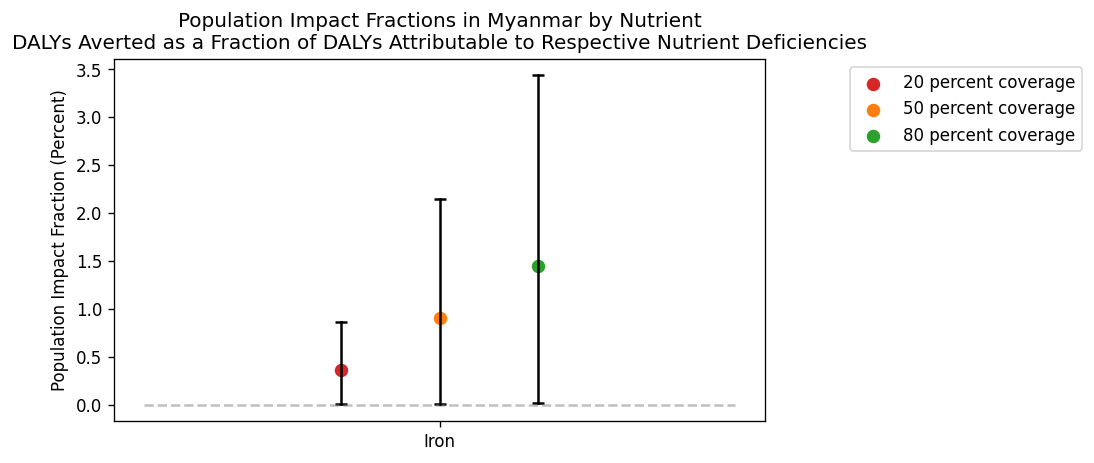

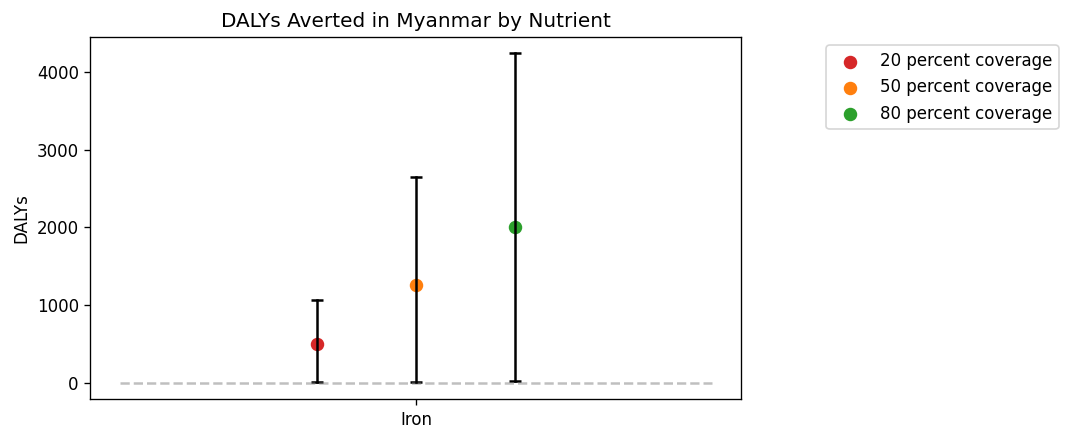

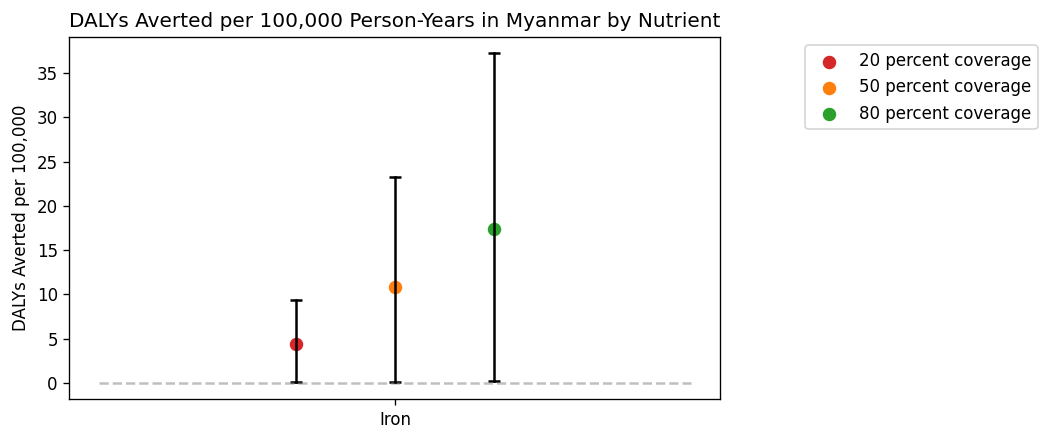

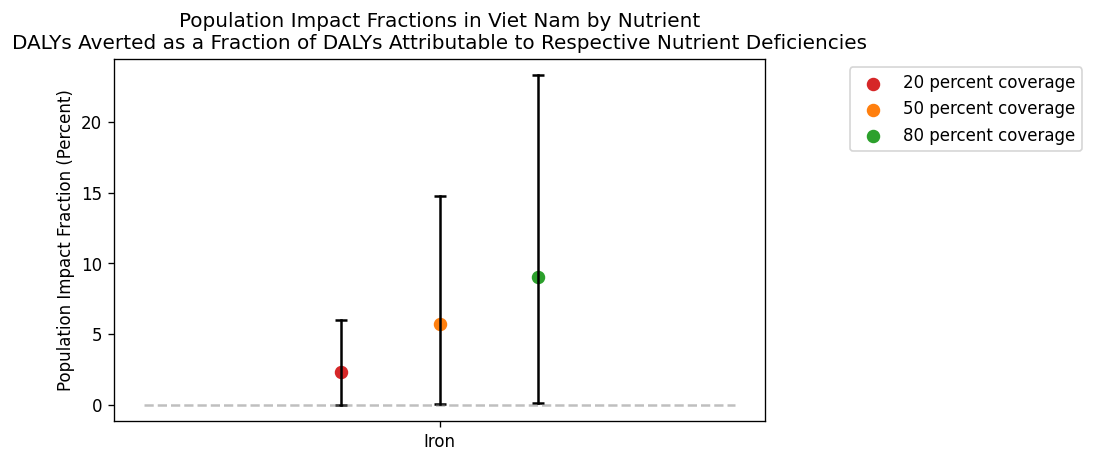

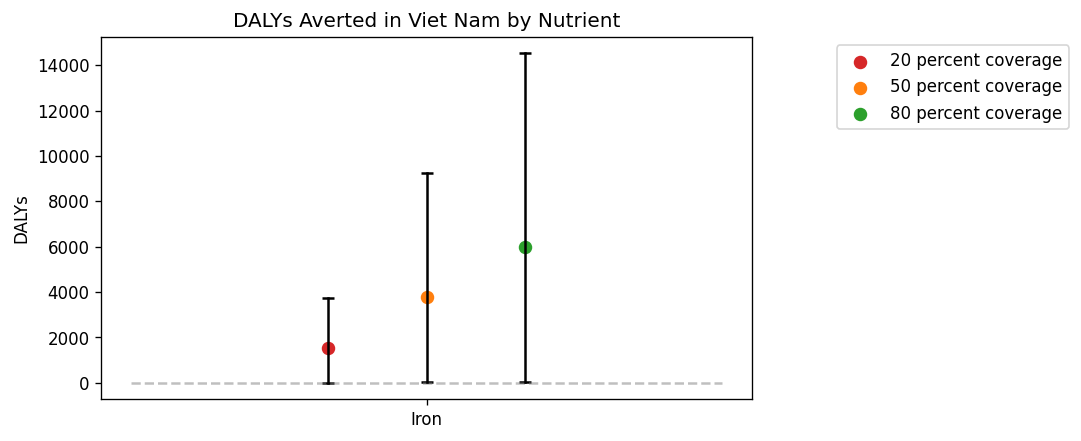

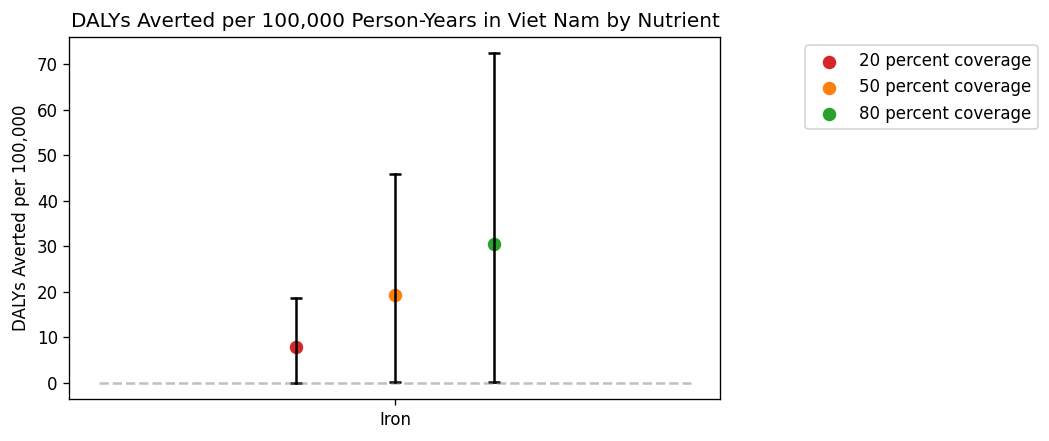

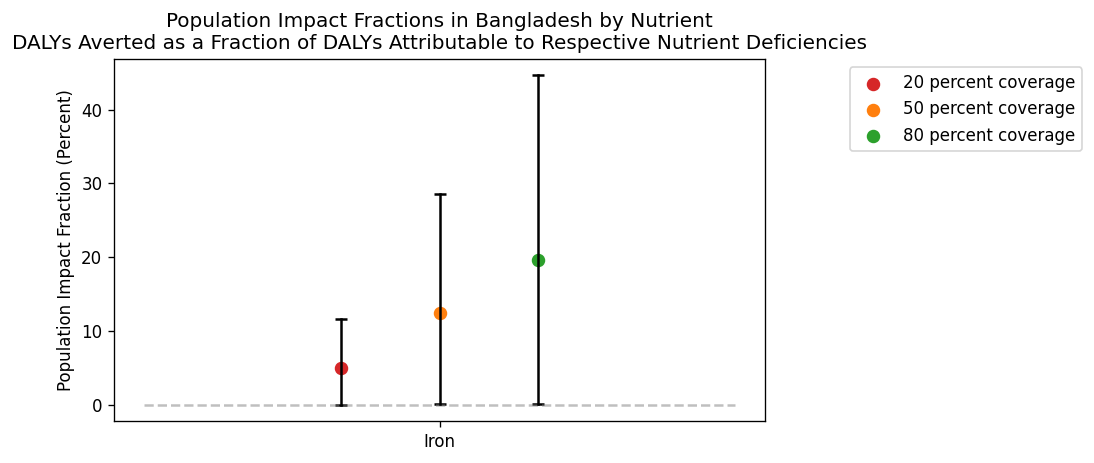

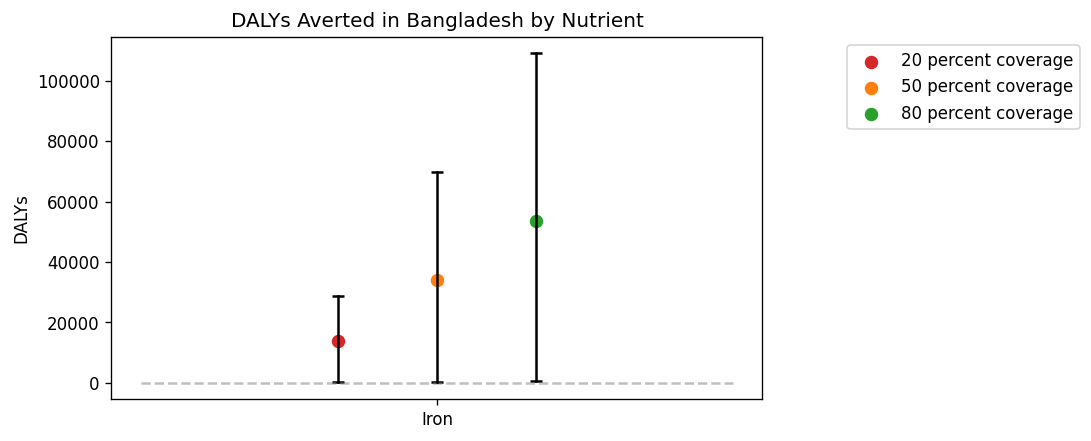

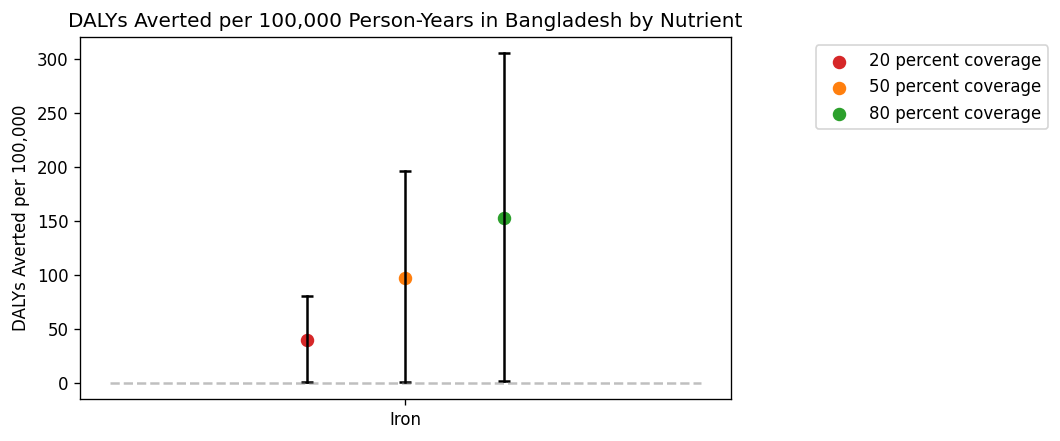

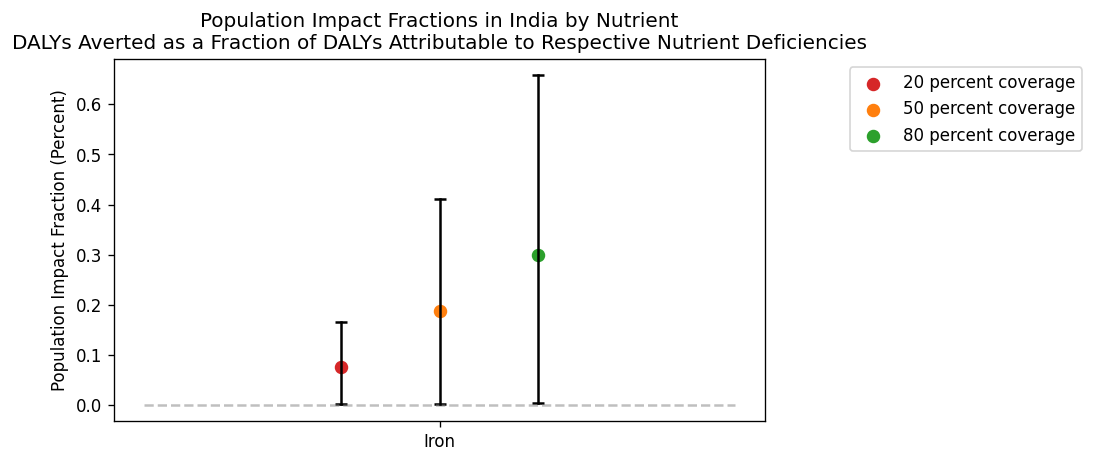

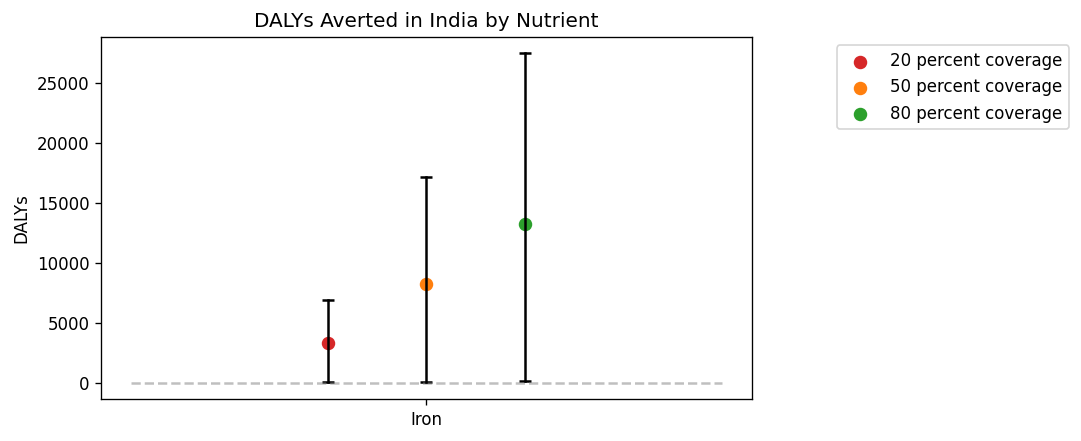

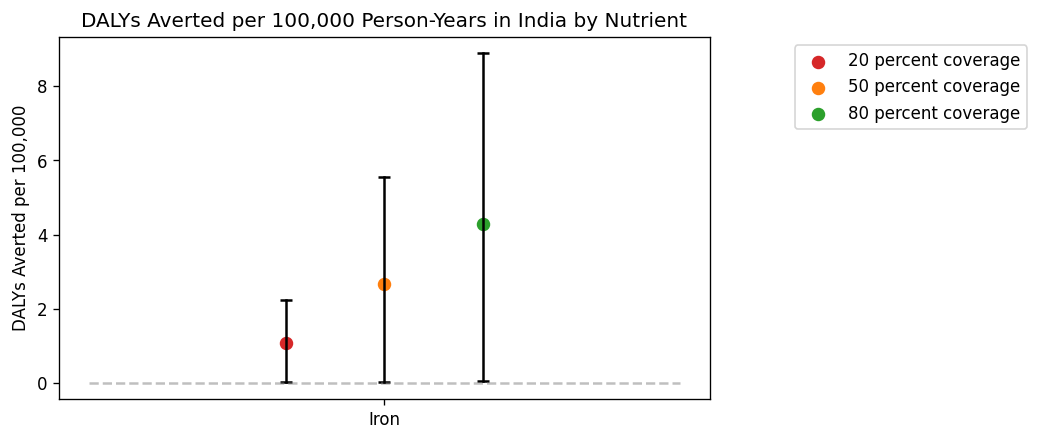

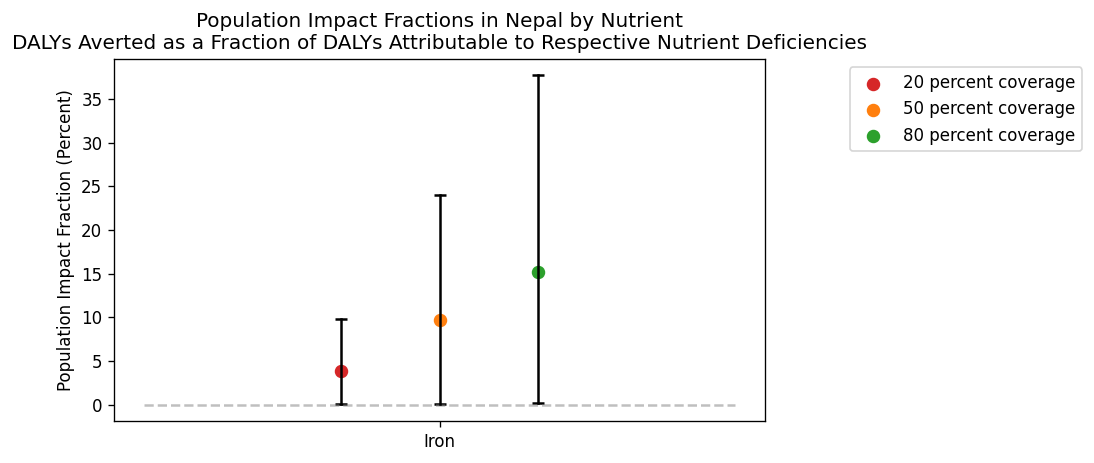

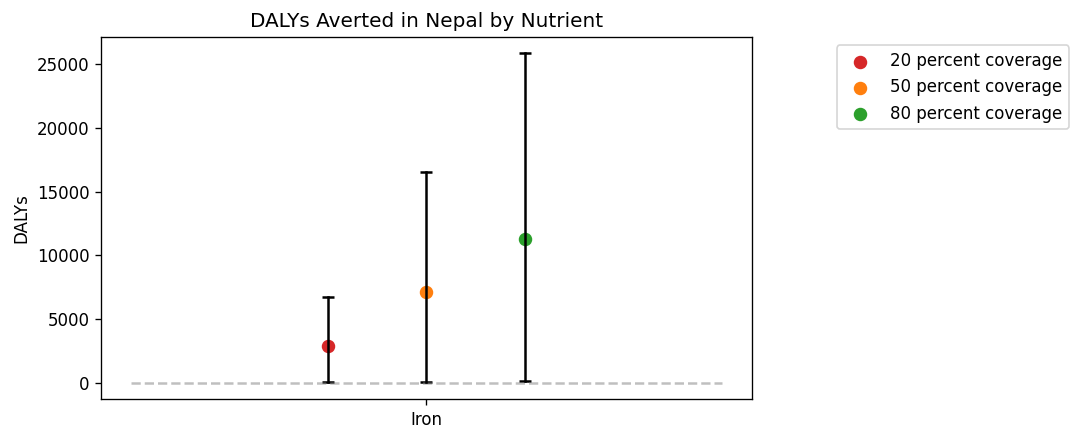

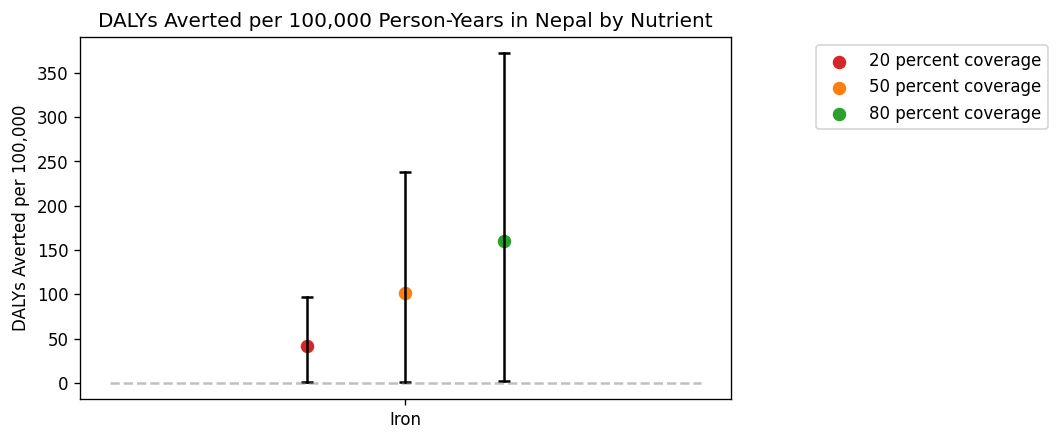

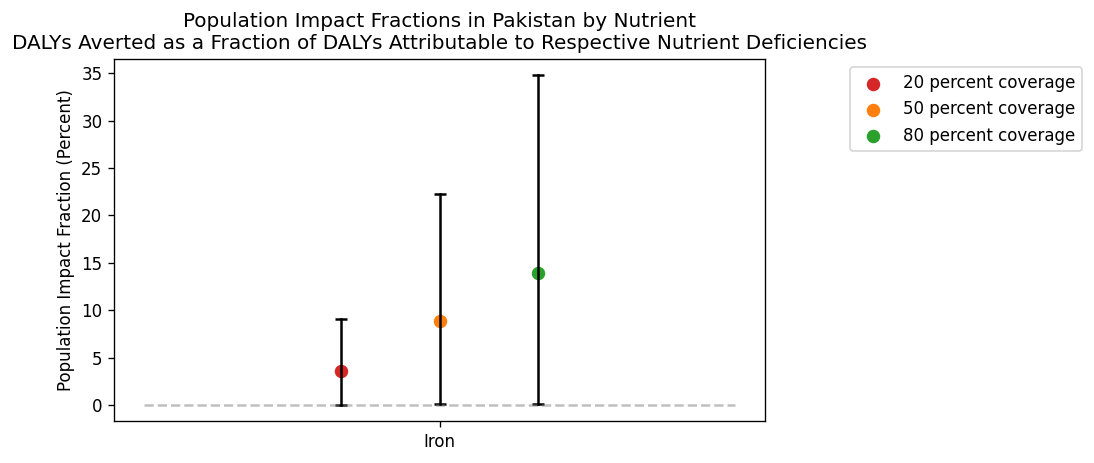

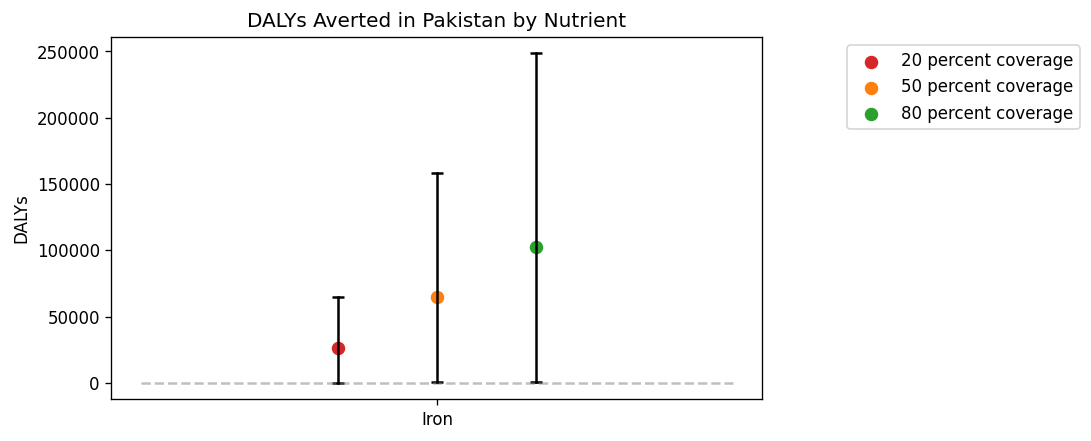

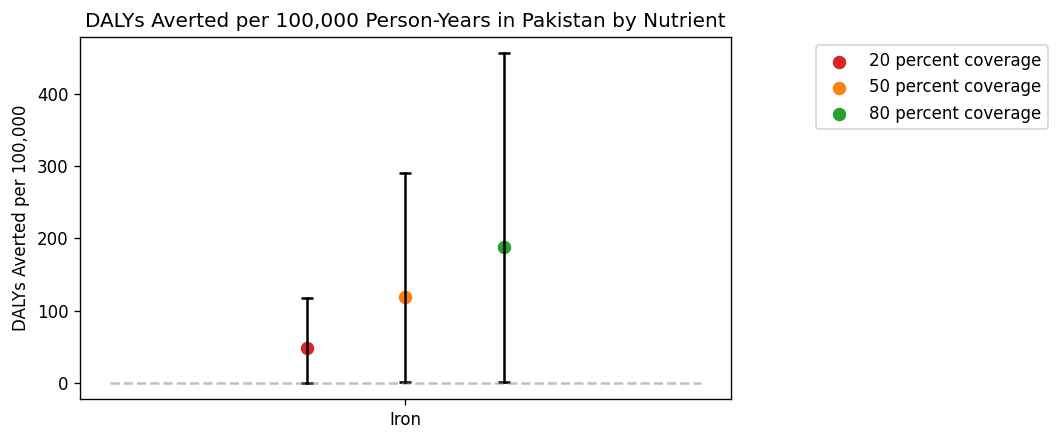

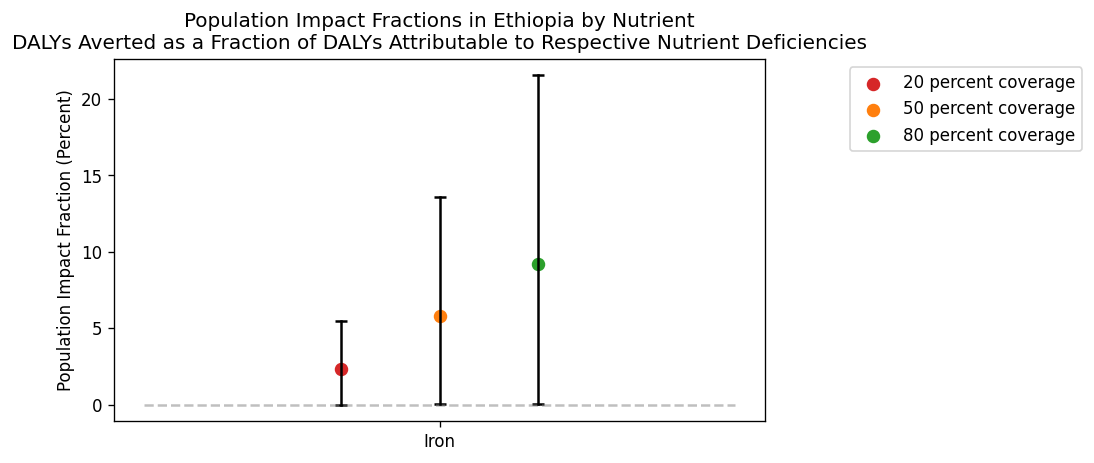

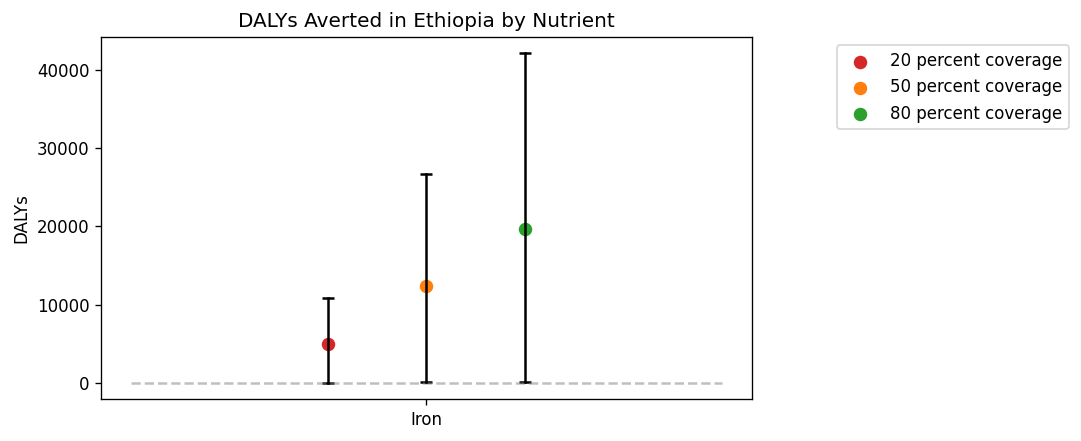

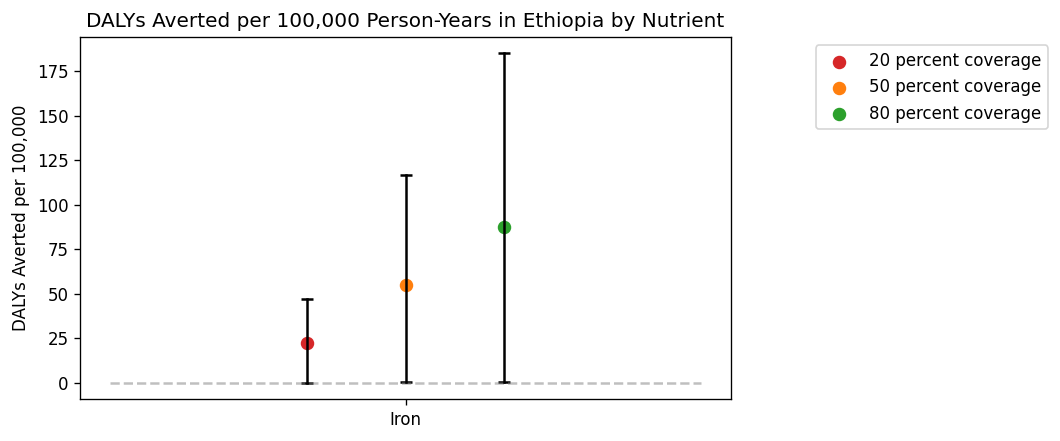

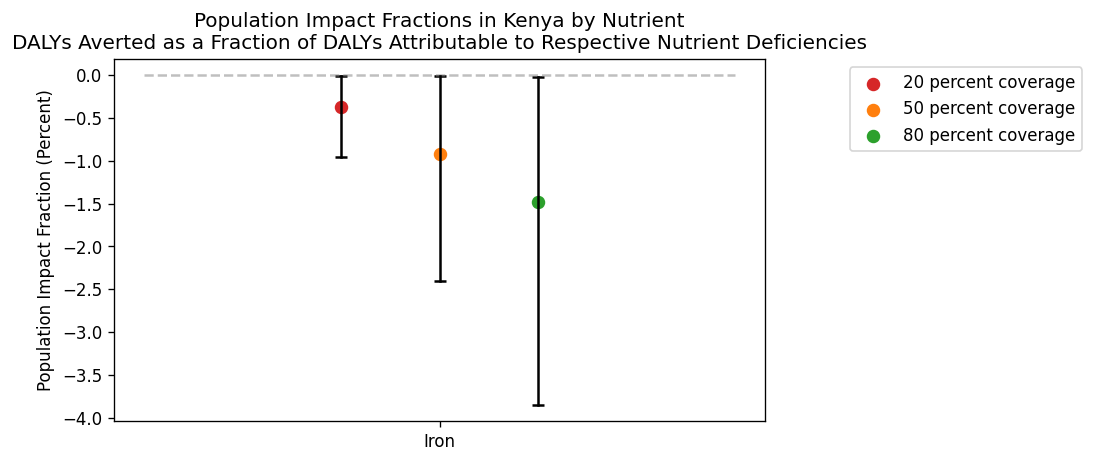

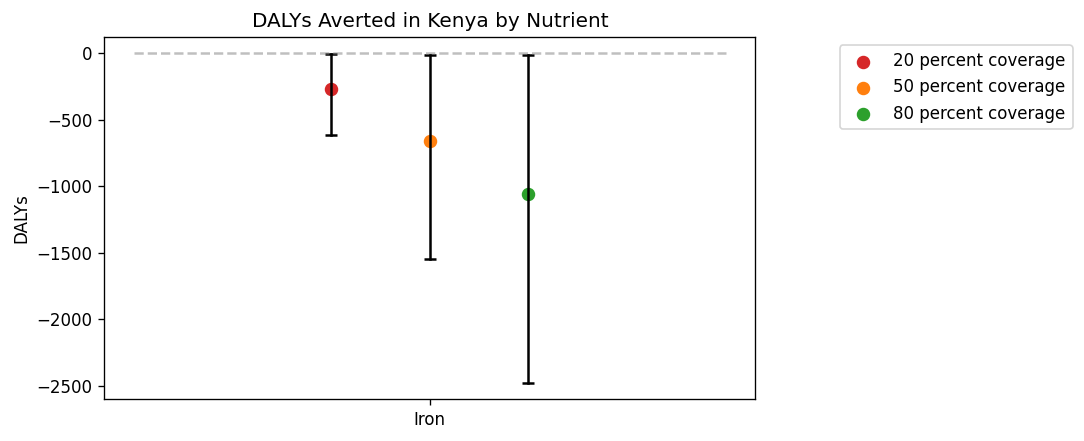

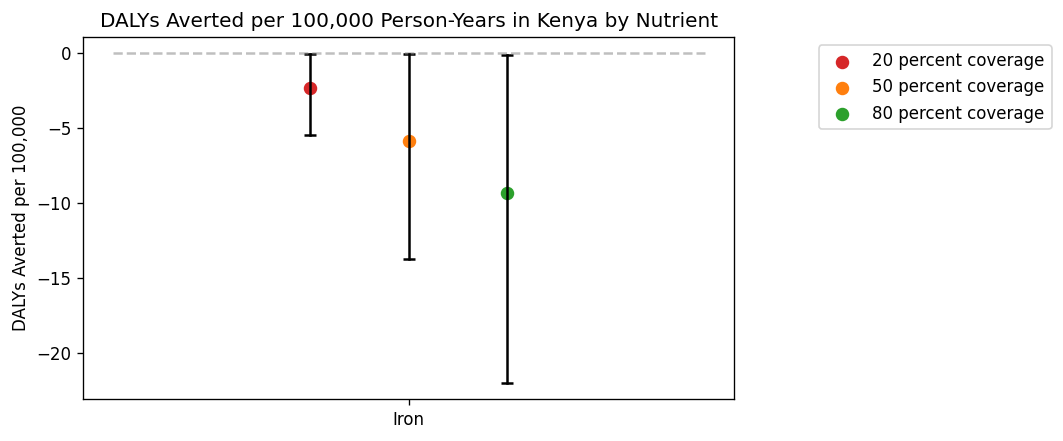

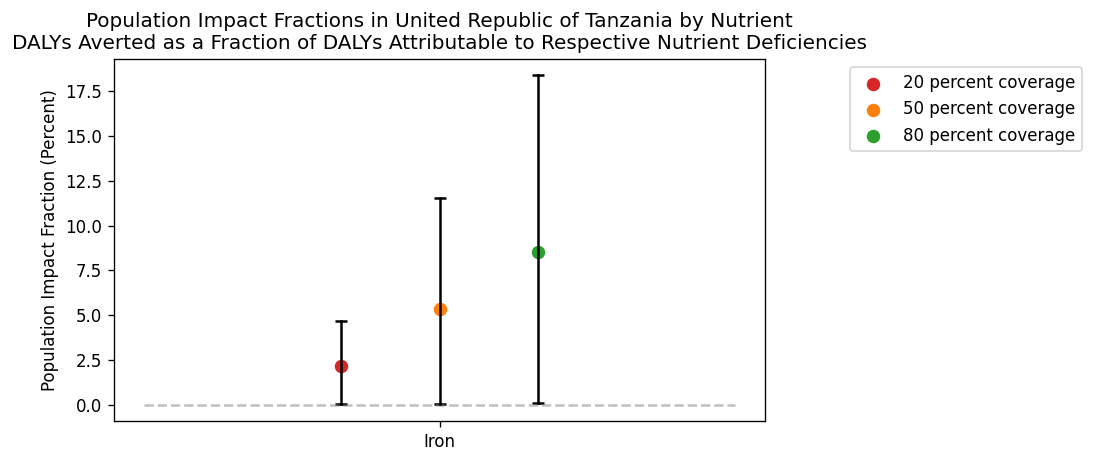

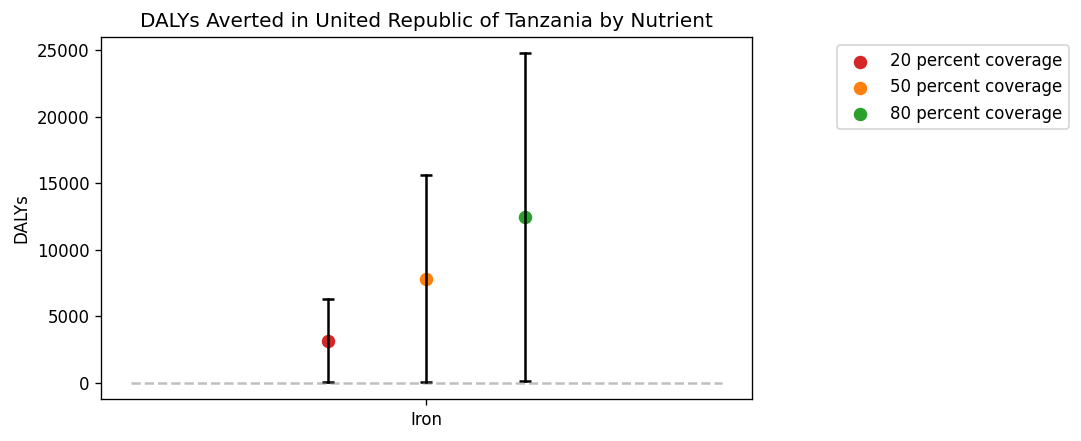

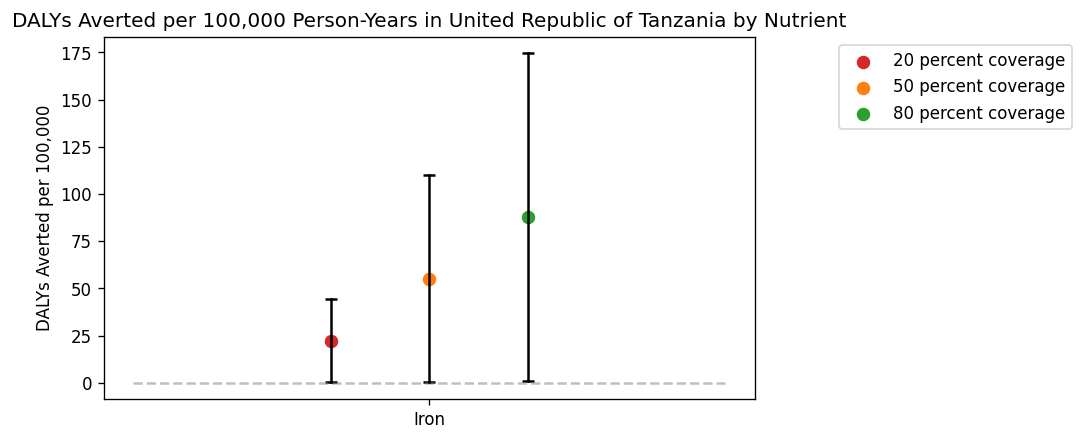

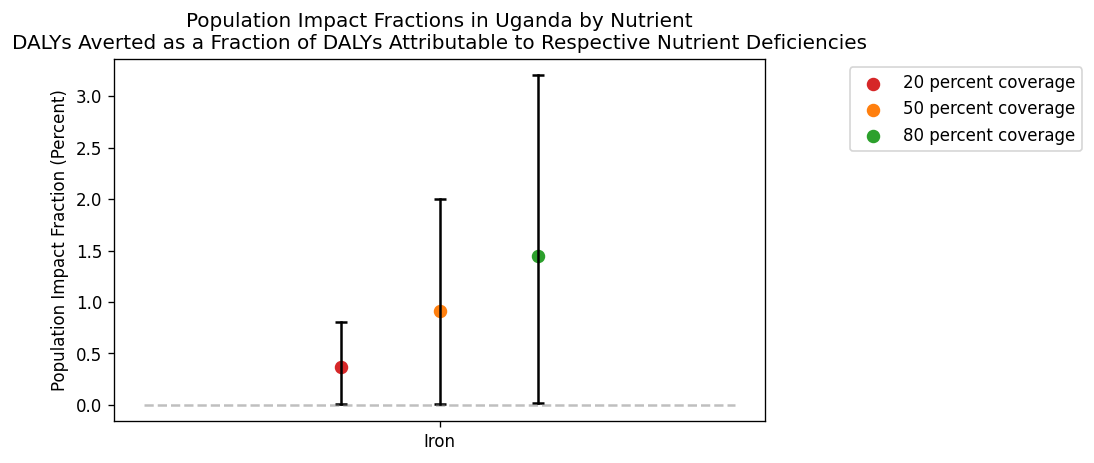

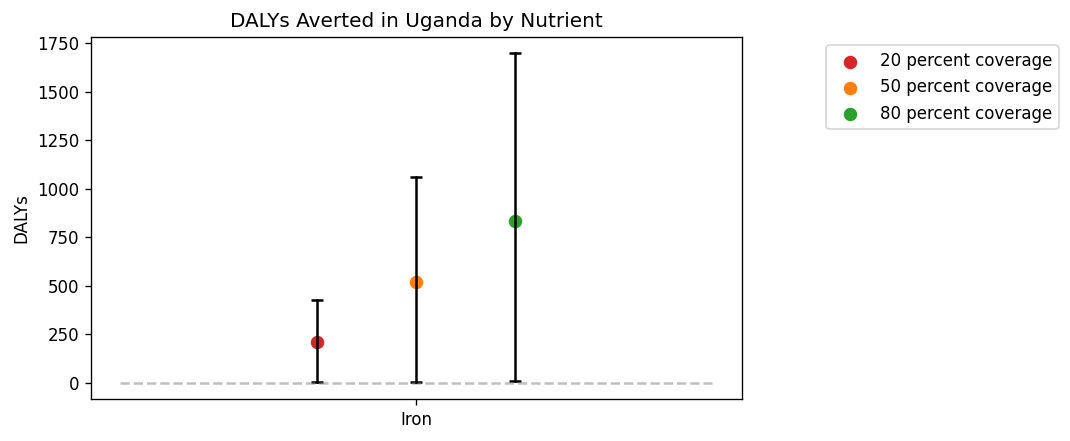

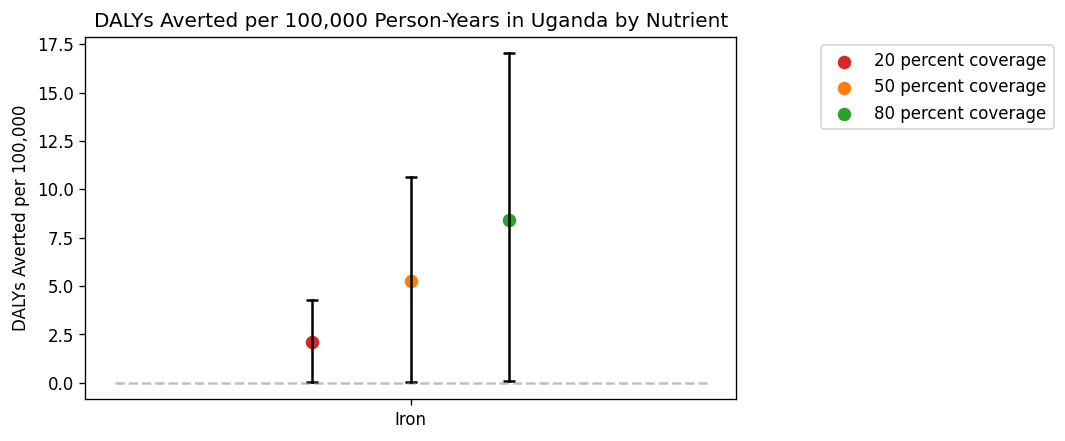

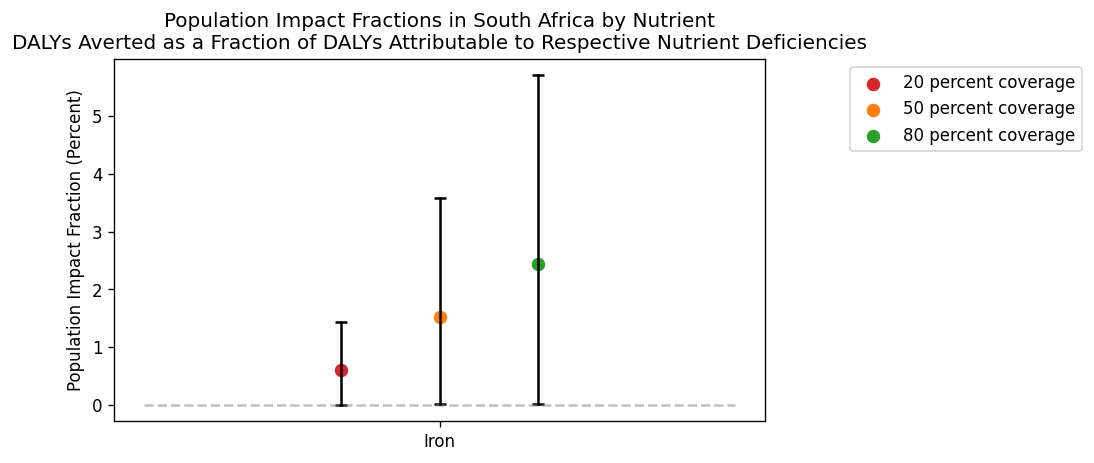

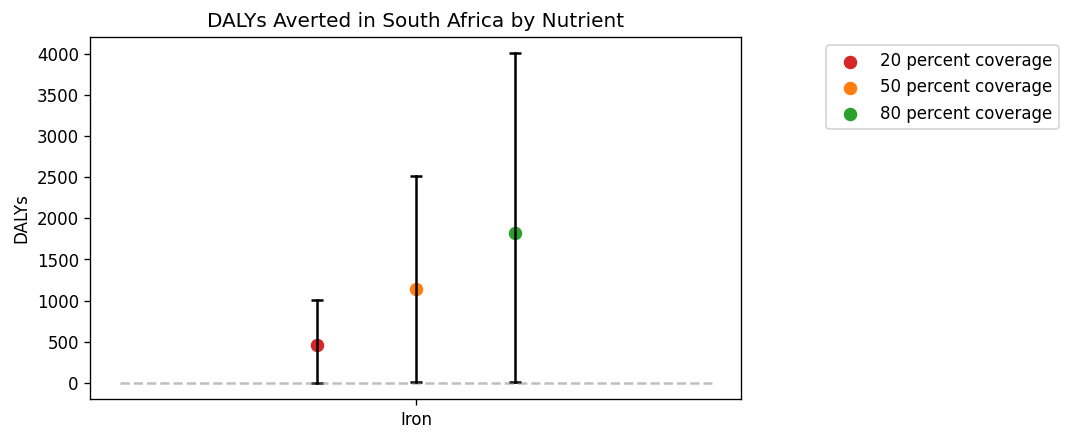

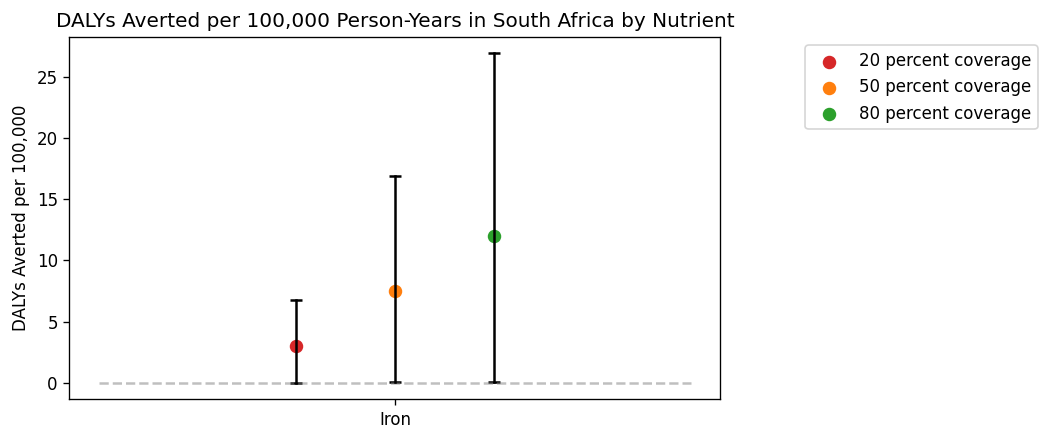

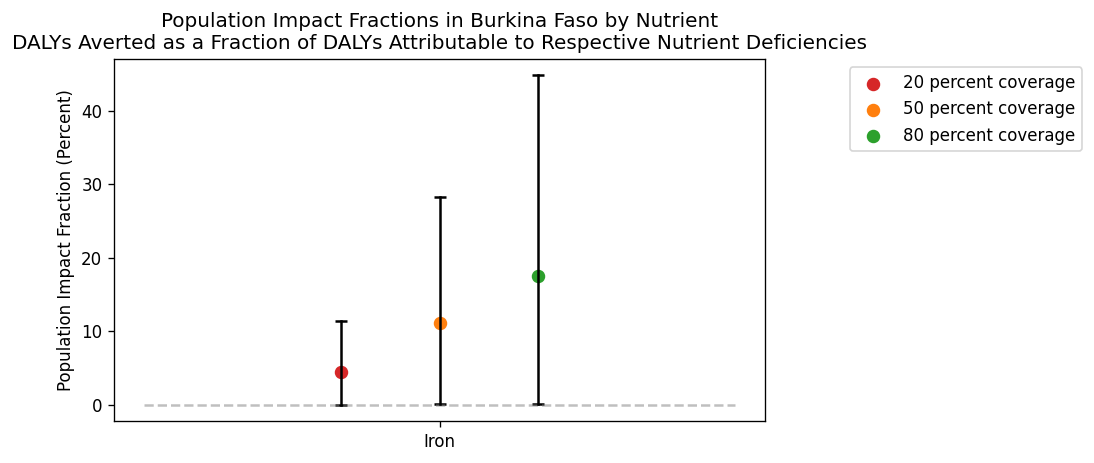

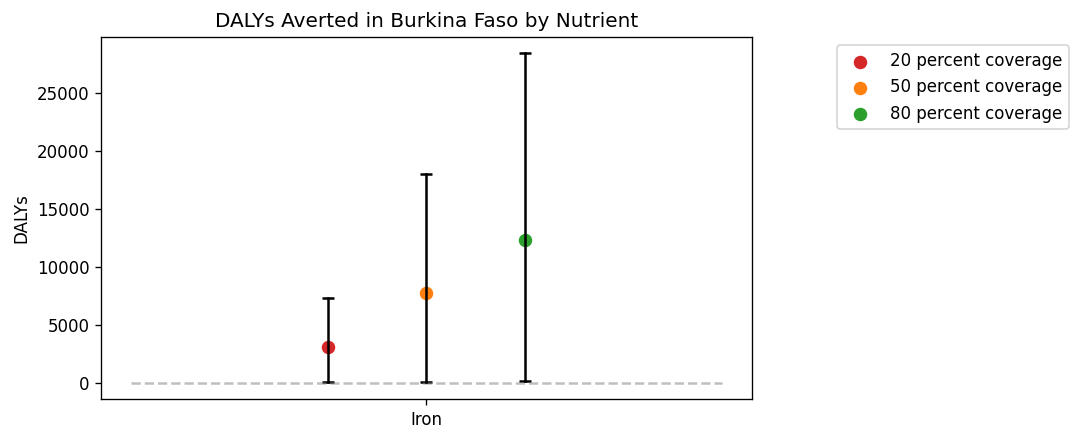

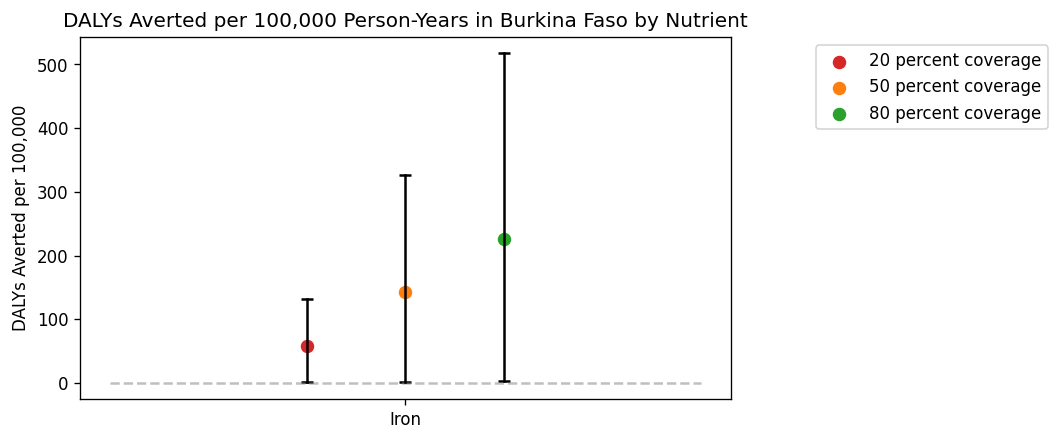

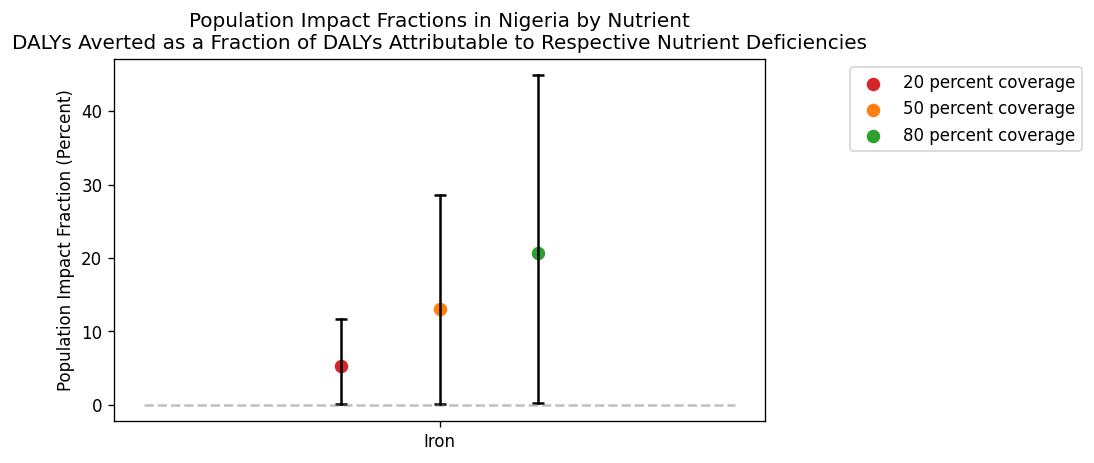

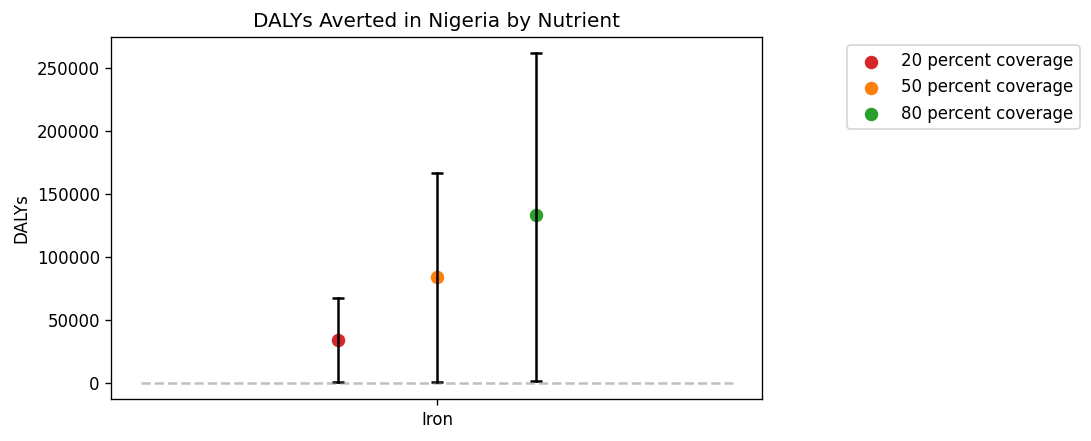

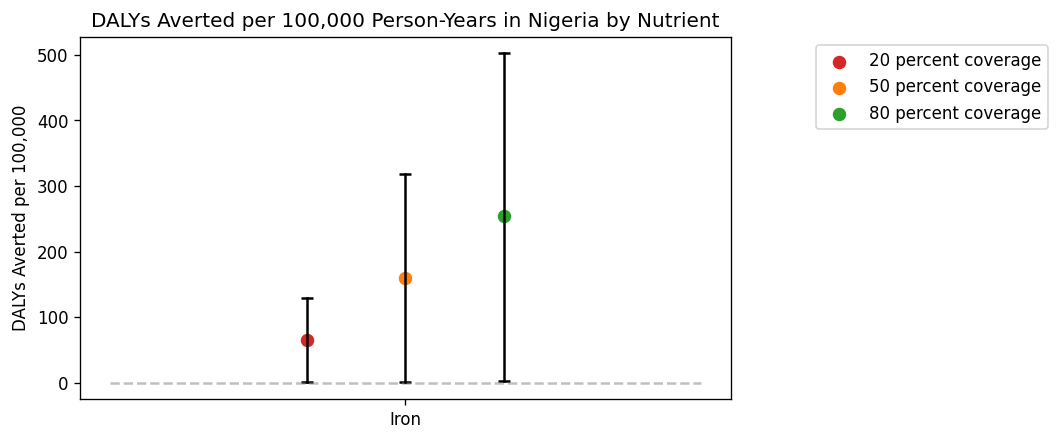

In [128]:
for location_id in results.location_id.unique():
    for measure in ['pif','counts_averted','rates_averted']:
        make_location_specific_plots(results, location_id, measure, coverage_levels)

# costs

In [132]:
vehicles = ['wheat flour']
nutrients = ['iron']

In [48]:
# read in cost data
costs = pd.read_csv('raw_costs.csv')
costs.head()

,location_name,vehicle,five_year_cost,ten_year_cost
0,Angola,oil,18.87,39.32
1,Bangladesh,oil,131.12,277.66
2,Bolivia (Plurinational State of),oil,4.93,9.57
3,Burkina Faso,oil,16.98,34.66
4,Burundi,oil,2.92,5.50


In [68]:
# merge location_ids
l = get_ids('location')
l = l.loc[l.location_type == 'admin0'].loc[l.location_id != 522]
cdi_name = l[l['location_id'] ==  205]['location_name'].values[0]
costs = costs.replace("Cote d'Ivoire", cdi_name)
costs_with_location_ids = costs.merge(l[['location_id','location_name']], on='location_name')

assert len(costs) == len(costs_with_location_names), "Error: different number of rows after merging with location IDs"

costs_with_location_ids.head()

,location_name,vehicle,five_year_cost,ten_year_cost,location_id
0,Angola,oil,18.87,39.32,168
1,Angola,maize flour,24.00,43.80,168
2,Angola,wheat flour,1.00,1.40,168
3,Bangladesh,oil,131.12,277.66,161
4,Bangladesh,wheat flour,5.20,9.90,161


In [131]:
measure = 'counts_averted'

results_icers = results.loc[results.measure == measure].loc[results.coverage_level == 0.8]
results_icers['vehicle'] = 'wheat flour'
results_icers = (results_icers
              .groupby(['location_id','coverage_level','measure','nutrient','vehicle'])
              .sum()
              .drop(columns='year')
              .reset_index()
              .merge(costs_with_location_ids, on=['location_id','vehicle']))
for i in list(range(0,1000)):
    results_icers[f'draw_{i}'] = results_icers['five_year_cost'] * 1_000_000 / results_icers[f'draw_{i}']
    
results_icers = results_icers.drop(columns=['five_year_cost','ten_year_cost'])
results_icers = results_icers.set_index([c for c in results_icers.columns if 'draw' not in c])
results_icers = results_icers.apply(pd.DataFrame.describe, percentiles=[0.025,0.975], axis=1).reset_index()
results_icers.head()

,location_id,coverage_level,measure,nutrient,vehicle,location_name,count,mean,std,min,2.5%,50%,97.5%,max
0,15,0.8,counts_averted,iron,wheat flour,Myanmar,1000.0,84.524477,2390.845905,-66989.824504,38.395072,124.114129,929.627558,10775.242056
1,20,0.8,counts_averted,iron,wheat flour,Viet Nam,1000.0,15.171578,2251.525613,-68034.938552,15.890627,68.493066,566.153724,7840.147998
2,161,0.8,counts_averted,iron,wheat flour,Bangladesh,1000.0,15.322664,712.006294,-20582.892326,9.681095,29.048509,243.610126,2743.383355
3,163,0.8,counts_averted,iron,wheat flour,India,1000.0,842.270454,27743.889772,-768242.815148,394.819929,1342.841616,10375.500583,114814.567224
4,164,0.8,counts_averted,iron,wheat flour,Nepal,1000.0,25.298720,743.932594,-21085.444321,10.026071,36.590559,273.761906,2882.425562


In [99]:
# print location ids that were excluded due to lack of cost data for each vehicle
print('Location IDs excluded due to lack of cost data for each vehicle')
for vehicle in vehicles:
    exclusions = ([c for c in list(results.loc[results.vehicle == vehicle].location_id.unique())
                     if c not in list(results_icers.loc[results_icers.vehicle == vehicle].location_id.unique())])
    print(f'{vehicle}: {exclusions}')

Location IDs excluded due to lack of cost data for each vehicle
wheat flour: [190]


In [155]:
def make_cost_per_daly_plots(data, vehicle, nutrient, uncertainty=True):
    df = (data
                .loc[data.vehicle == vehicle]
                .loc[data.nutrient == nutrient]
                .sort_values(by='mean'))
    
    f, ax = plt.subplots(figsize=(7, 4), dpi=120)
    colors = ['tab:red', 'tab:orange', 'tab:green']

    location_spacer = 0.15
    x_vals = []
    for i in list(range(0, len(df))):
        if uncertainty: 
            plt.plot([location_spacer * i, location_spacer * i],
                     [df['2.5%'].values[i], df['97.5%'].values[i]], c='black')
            plt.scatter([location_spacer * i], df['2.5%'].values[i], s=50, marker='_',
                        c='black')
            plt.scatter([location_spacer * i], df['97.5%'].values[i], s=50, marker='_',
                        c='black')

        x_vals.append(location_spacer * i)
    
    plt.scatter(x_vals, df['mean'], s=50)

    plt.hlines(0, 0,
               location_spacer * (len(df)),
               linestyle='dashed', color='grey', alpha=0.5)
    
    plt.plot()
    
    plt.title(f'Cost per DALY Averted by Location\n{nutrient.capitalize()} in {vehicle.capitalize()}')
    plt.ylabel('Dollars per DALY Averted')

    x_ticks = []
    for x in list(range(0, len(df))):
        x_ticks.append(location_spacer * x)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(df.location_name.values)
    plt.xticks(rotation=90)
    if uncertainty:
        plt.savefig(f'results_plots/cost_per_daly/{nutrient}_{vehicle}_by_location_with_uncertainty.png', bbox_inches='tight')
    else:
        plt.savefig(f'results_plots/cost_per_daly/{nutrient}_{vehicle}_by_location.png', bbox_inches='tight')

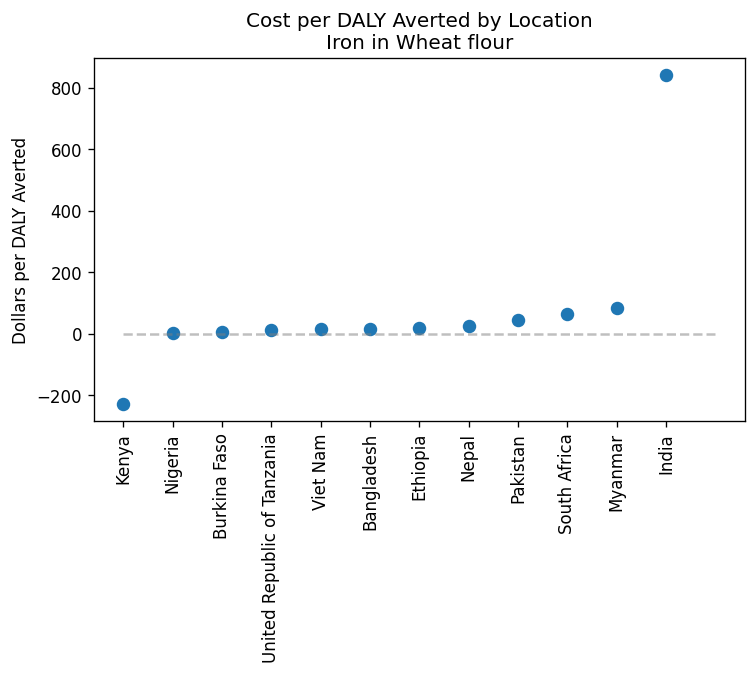

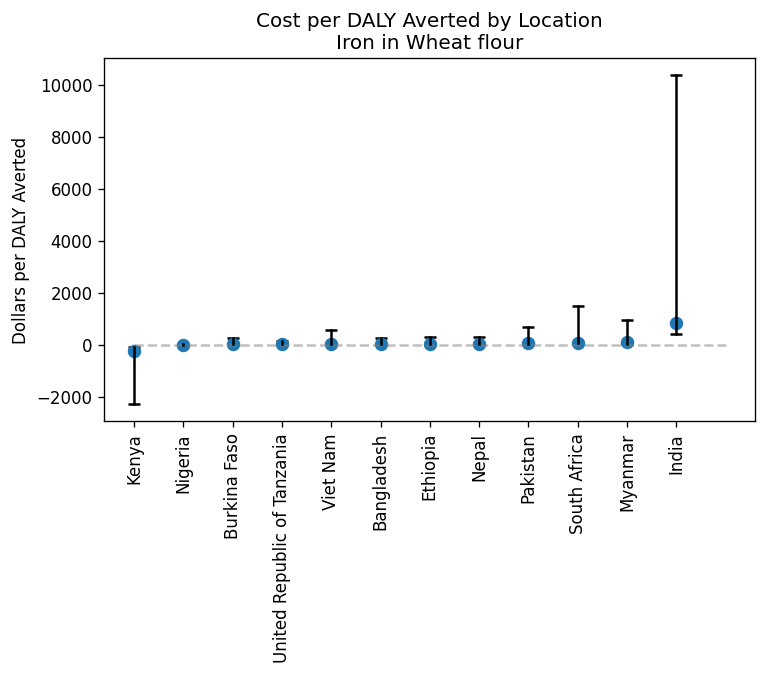

In [156]:
for nutrient in nutrients:
    for vehicle in vehicles:
        make_cost_per_daly_plots(results_icers, vehicle, nutrient, False)
        make_cost_per_daly_plots(results_icers, vehicle, nutrient)

In [157]:
def make_location_specific_cost_per_daly_plots(data, location_id, uncertainty=True):
    df = data.loc[data.location_id == location_id]
    df['label'] = df.nutrient.str.capitalize() + ' in ' + df.vehicle
    
    f, ax = plt.subplots(figsize=(7, 4), dpi=120)
    colors = ['tab:red', 'tab:orange', 'tab:green']

    nutrient_spacer = 0.15
    x_vals = []
    for i in list(range(0, len(df))):
        if uncertainty: 
            plt.plot([nutrient_spacer * i, nutrient_spacer * i],
                     [df['2.5%'].values[i], df['97.5%'].values[i]], c='black')
            plt.scatter([nutrient_spacer * i], df['2.5%'].values[i], s=50, marker='_',
                        c='black')
            plt.scatter([nutrient_spacer * i], df['97.5%'].values[i], s=50, marker='_',
                        c='black')

        x_vals.append(nutrient_spacer * i)
    
    plt.scatter(x_vals, df['mean'], s=50)

    plt.hlines(0, 0,
               nutrient_spacer * (len(df)),
               linestyle='dashed', color='grey', alpha=0.5)
    
    plt.plot()
    
    plt.title(f'{df.location_name.unique()[0]}\nCost per DALY Averted by Nutrient and Vehicle Combination')
    plt.ylabel('Dollars per DALY Averted')

    x_ticks = []
    for x in list(range(0, len(df))):
        x_ticks.append(nutrient_spacer * x)
    ax.set_xticks(x_ticks)
    ax.set_xticklabels(df.label.values)
    plt.xticks(rotation=90)
    if uncertainty:
        plt.savefig(f'results_plots/cost_per_daly/by_location/{df.location_name.unique()[0]}_costs_with_uncertainty.png', bbox_inches='tight')
    else:
        plt.savefig(f'results_plots/cost_per_daly/by_location/{df.location_name.unique()[0]}_costs.png', bbox_inches='tight')

/ihme/code/central_comp/miniconda_svc-ccomp/envs/v107/lib/python3.7/site-packages/ipykernel_launcher.py:5: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  """


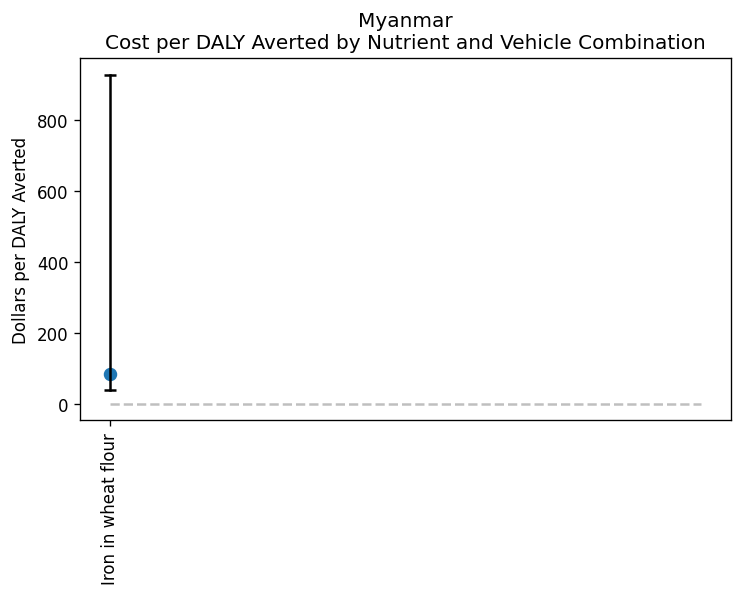

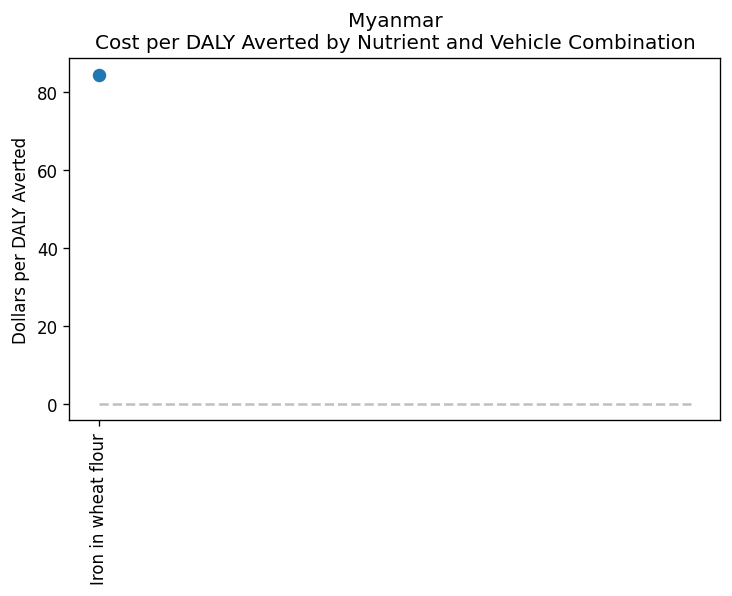

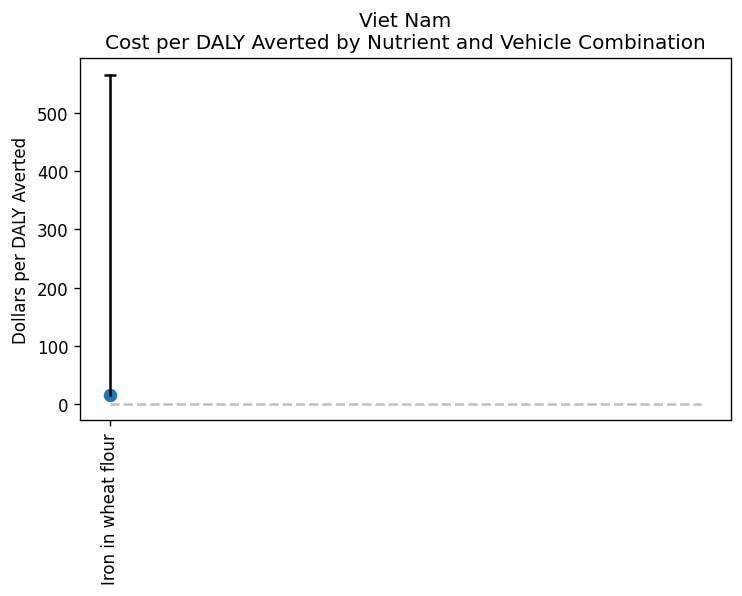

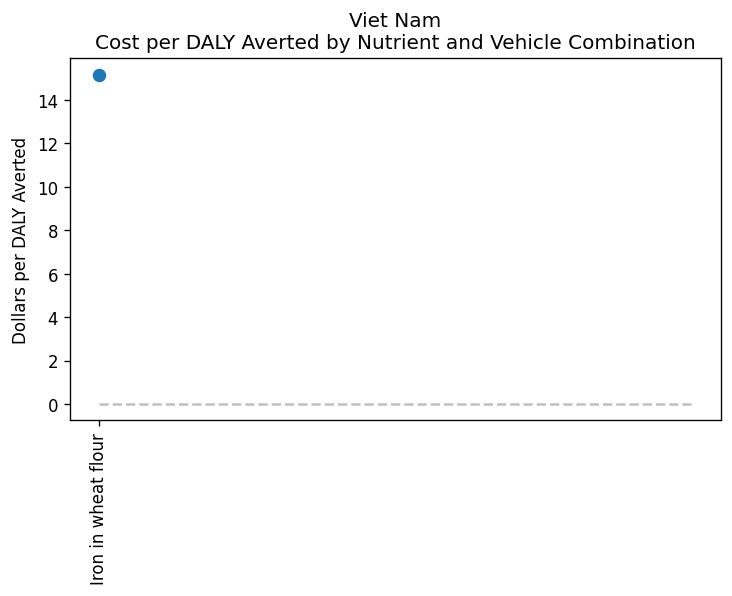

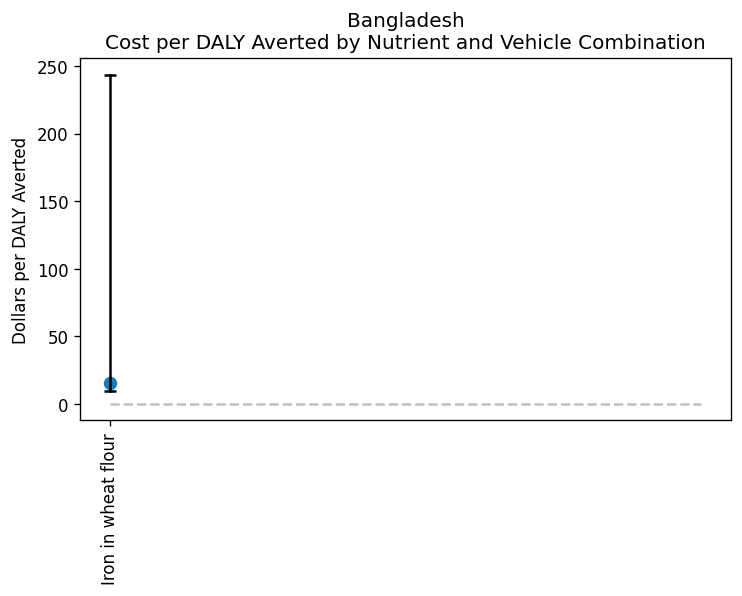

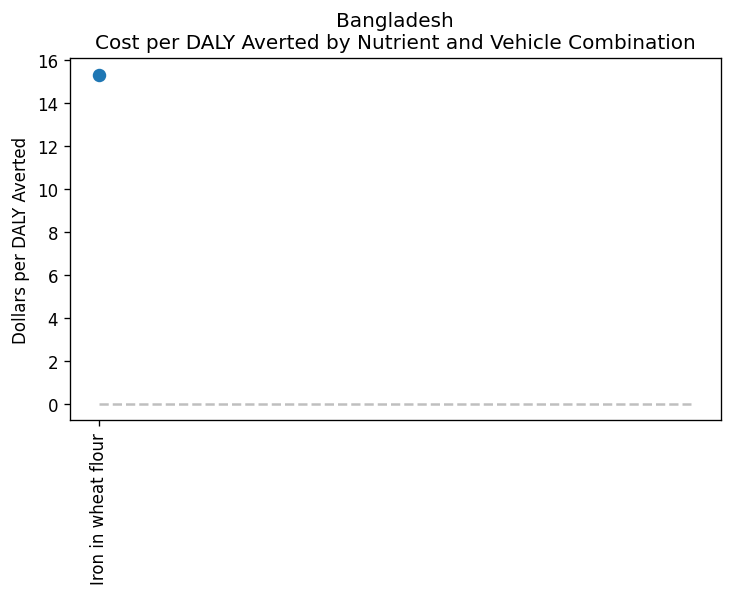

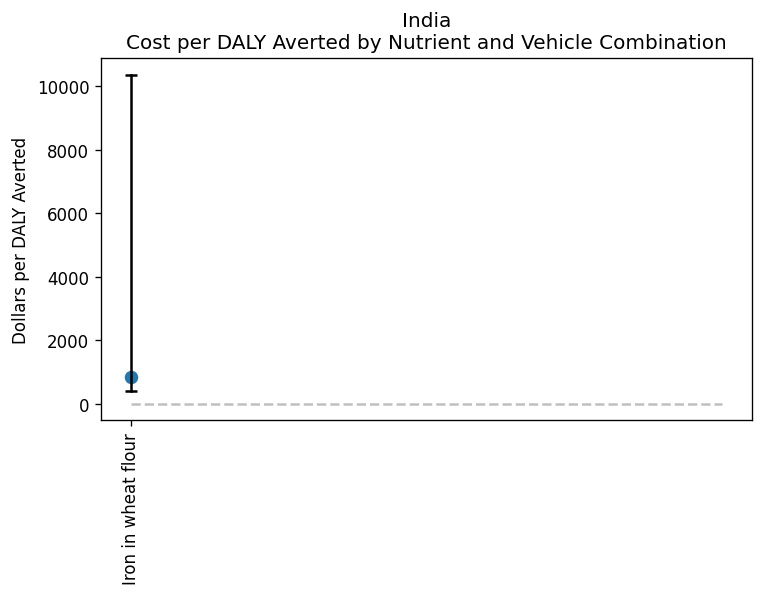

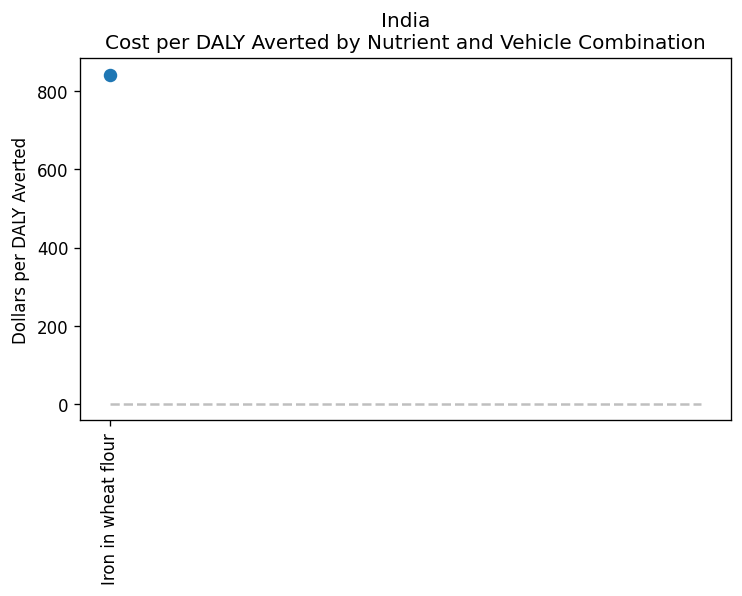

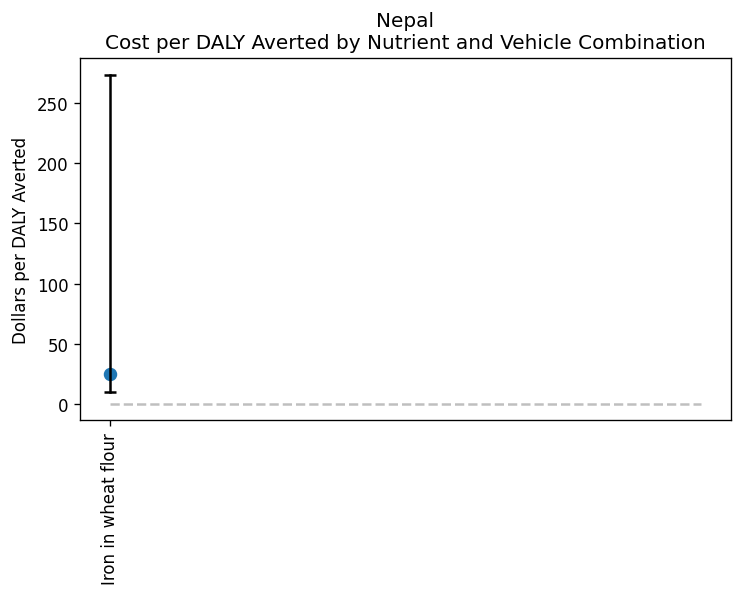

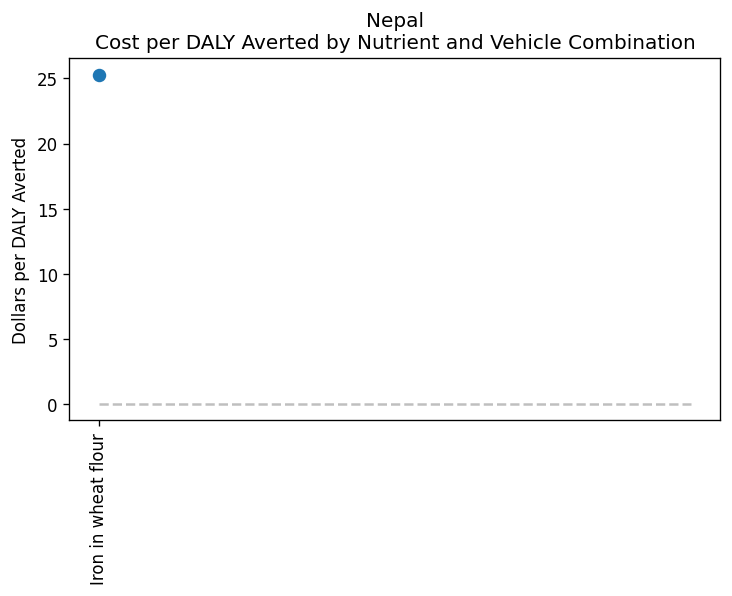

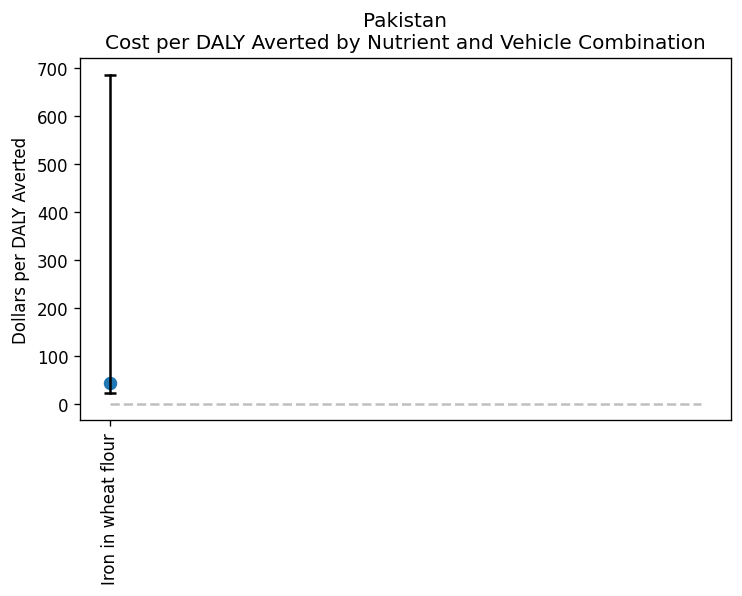

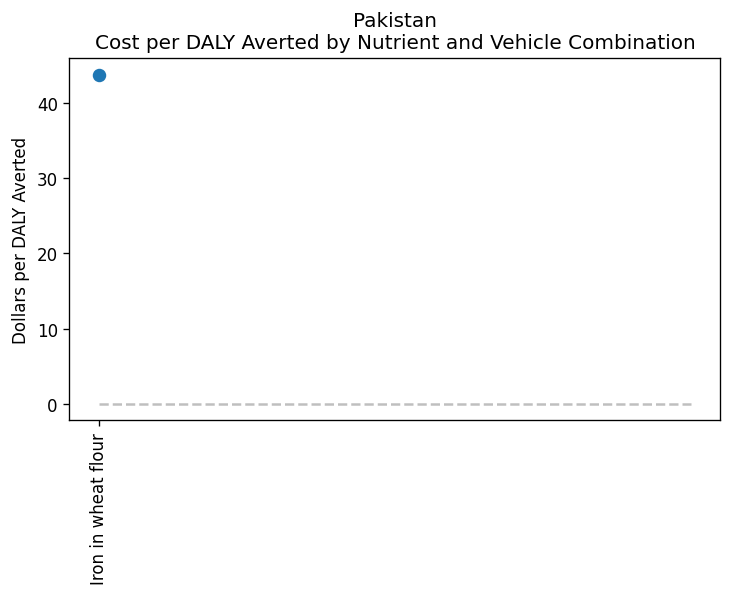

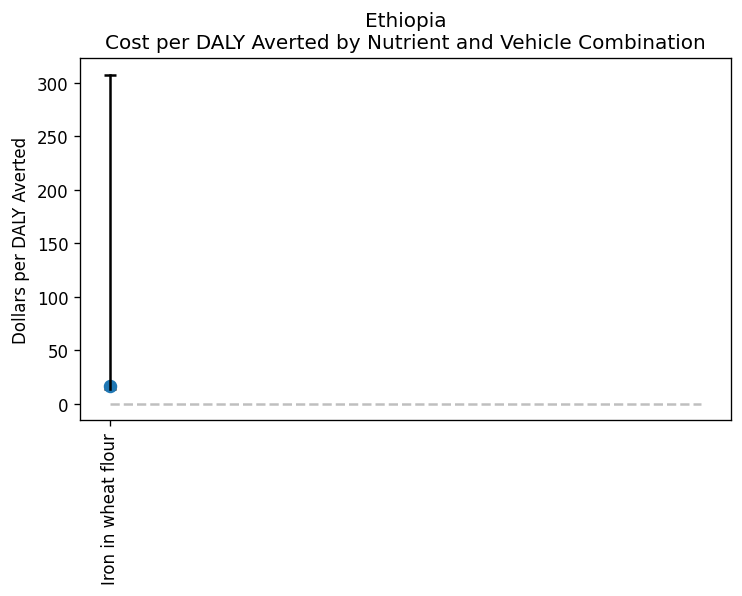

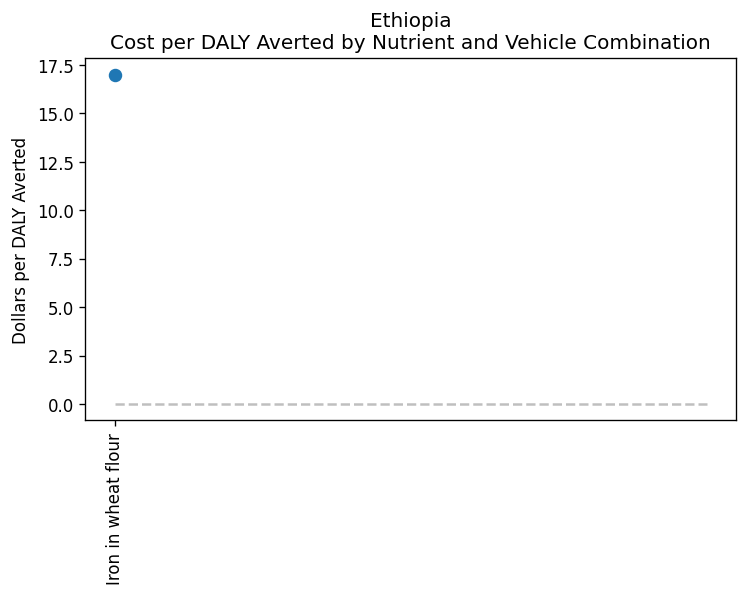

In [ ]:
for location_id in results_icers.location_id.unique():
    make_location_specific_cost_per_daly_plots(results_icers, location_id, uncertainty=True)
    make_location_specific_cost_per_daly_plots(results_icers, location_id, uncertainty=False)